# JUSTIN WRIGHT: IBM HR ATTRITION DATA

This is a fictional data set created by IBM data scientists helping use employee data to predict attrition.

Data fields include various pieces of employee information. For example, Age, Attrition, Department, DistanceFromHome, Education, JobSatisfaction, MaritalStatus, MonthlyIncome, WorkLifeBalance, YearsAtCompany, etc.

Clarification on some data field classifications: 
Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor' 
EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High' 
JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High' 
JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High' 
PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding' 
RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High' 
WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'


In [14]:
#CALL LIBRARIES
import psycopg2
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # We want to suppress warnings
import os

In [15]:
try:
    conn = psycopg2.connect(host = "localhost", database = "postgres", user = "postgres", password = "mis5400")
    print(conn)
    cur = conn.cursor()
    print(cur)
except exception as e:
    print(e)    
sql = 'SELECT * FROM PUBLIC."ibm_hr_data"'
data = sqlio.read_sql_query(sql, conn)

<connection object at 0x1a221d5d18; dsn: 'user=postgres password=xxx dbname=postgres host=localhost', closed: 0>
<cursor object at 0x1a22c92048; closed: 0>



### Examine and Understand Data

Basic functions to understand what the data we're looking at is all about


In [16]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
employeenumber              1470 non-null int64
age                         1470 non-null int64
attrition                   1470 non-null object
businesstravel              1470 non-null object
dailyrate                   1470 non-null int64
department                  1470 non-null object
distancefromhome            1470 non-null int64
education                   1470 non-null int64
educationfield              1470 non-null object
employeecount               1470 non-null int64
environmentsatisfaction     1470 non-null int64
gender                      1470 non-null object
hourlyrate                  1470 non-null int64
jobinvolvement              1470 non-null int64
joblevel                    1470 non-null int64
jobrole                     1470 non-null object
jobsatisfaction             1470 non-null int64
maritalstatus               1470 non-null object
monthlyincome         

,employeenumber,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,8,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,10,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,11,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,12,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,13,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7



#### Unique Values

This helps to simply understand the number of unique values we are dealing with


In [17]:
Nunique = data.nunique()
Nunique = Nunique.sort_values()
Nunique

over18                         1
standardhours                  1
employeecount                  1
gender                         2
attrition                      2
performancerating              2
overtime                       2
maritalstatus                  3
department                     3
businesstravel                 3
stockoptionlevel               4
environmentsatisfaction        4
jobinvolvement                 4
jobsatisfaction                4
relationshipsatisfaction       4
worklifebalance                4
joblevel                       5
education                      5
educationfield                 6
trainingtimeslastyear          7
jobrole                        9
numcompaniesworked            10
percentsalaryhike             15
yearssincelastpromotion       16
yearswithcurrmanager          18
yearsincurrentrole            19
distancefromhome              29
yearsatcompany                37
totalworkingyears             40
age                           43
hourlyrate


## Data Visualization

Some basic visualization tools to help us understand the distribution and begin to identify trends in the data


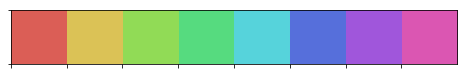

In [19]:
# Seaborn Color Pallate
sns.palplot(sns.color_palette("hls", 8))
plt.show()

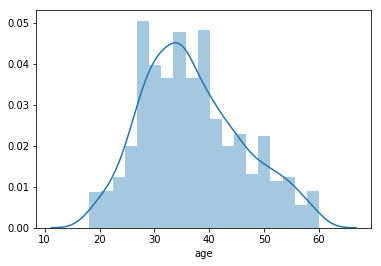

In [21]:
# Age Distribution

sns.distplot(data['age'])
plt.show()

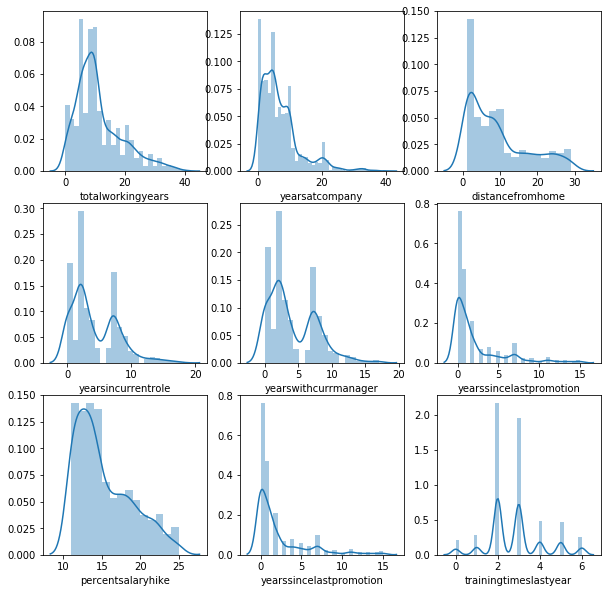

In [27]:
# Display Multiple Distribution Plots

fig,ax = plt.subplots(3,3, figsize=(10,10))               # 'ax' has references to all the four axes
sns.distplot(data['totalworkingyears'], ax = ax[0,0]) 
sns.distplot(data['yearsatcompany'], ax = ax[0,1]) 
sns.distplot(data['distancefromhome'], ax = ax[0,2]) 
sns.distplot(data['yearsincurrentrole'], ax = ax[1,0]) 
sns.distplot(data['yearswithcurrmanager'], ax = ax[1,1]) 
sns.distplot(data['yearssincelastpromotion'], ax = ax[1,2]) 
sns.distplot(data['percentsalaryhike'], ax = ax[2,0]) 
sns.distplot(data['yearssincelastpromotion'], ax = ax[2,1]) 
sns.distplot(data['trainingtimeslastyear'], ax = ax[2,2]) 
plt.show()

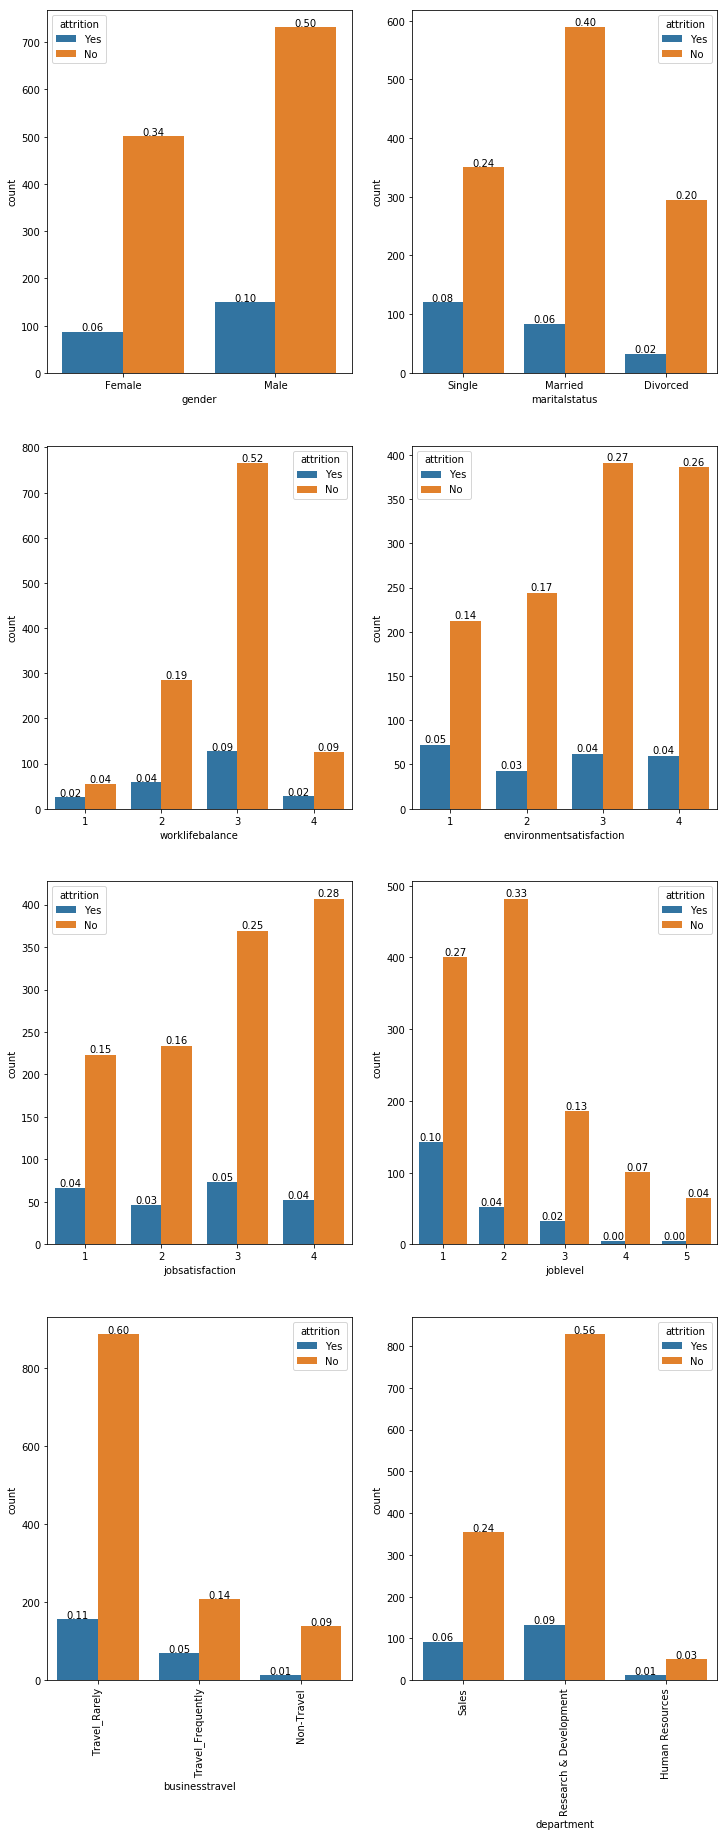

In [28]:
# Multiple Plot Counts
    # These plots help us see the counts of individuals, if they were terminated or not

total_records= len(data)
columns = ["gender","maritalstatus","worklifebalance","environmentsatisfaction","jobsatisfaction",
           "joblevel","businesstravel","department"]
plt.figure(figsize=(12,8))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(data[i])
    ax1 = sns.countplot(data=data,x= i,hue="attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total_records,0),
                ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()


## Initial Observations

1. Single attrition rate is nearly half in maritalstatus
2. joblevel—1  attrition rate is also high compared to other job levels
3. environmentsatisfaction—1 has high attrition rate
4. Attrition rates are high in the following attributes: 
    male | jobsatisfaction—1 | sales
    